In [1]:
#import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#read the file
df = pd.read_csv("South_German_Credit_formatted.csv")
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [3]:
#check dataset's size
df.shape

(1000, 21)

In [4]:
df["credit_risk"].value_counts()

1    700
0    300
Name: credit_risk, dtype: int64

Dataset is imbalanced due to that it has more "good" values (for credit_risk column) than "bad" values. This imbalance may cause us to make weak predictions.

## Data Cleaning and Preparation

In [5]:
#Is there any duplicate value in the dataset?
df.duplicated().value_counts()

False    1000
dtype: int64

There is not any duplicate value in the dataset.

In [6]:
#Is there any null value in the dataset?
df.isna().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

There is not any null value in the dataset.

In [7]:
#How many columns does this dataset have?
df.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

Majority of this dataset consists of categorical values and I plan to use some classification models to predict the credit risk. Therefore, I will need to drop some of the variables that aren't categorical and then, I will convert them to numerical labels with **LabelEncoder()**: 

In [9]:
dataset = df.drop(["duration","amount","age"],1)
dataset.columns

C:\Users\Admin'\AppData\Local\Temp/ipykernel_18424/2337924716.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dataset = df.drop(["duration","amount","age"],1)


Index(['status', 'credit_history', 'purpose', 'savings', 'employment_duration',
       'installment_rate', 'personal_status_sex', 'other_debtors',
       'present_residence', 'property', 'other_installment_plans', 'housing',
       'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker',
       'credit_risk'],
      dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder

for x in dataset.columns:
    dataset[x] = LabelEncoder().fit_transform(dataset[x])

dataset.head()

,status,credit_history,purpose,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,4,2,0,1,3,1,0,3,1,2,0,0,2,1,0,1,1
1,0,4,0,0,2,1,2,0,1,0,2,0,1,2,0,0,1,1
2,1,2,8,1,3,1,1,0,3,0,2,0,0,1,1,0,1,1
3,0,4,0,0,2,2,2,0,1,0,2,0,1,1,0,0,0,1
4,0,4,0,0,2,3,2,0,3,1,0,1,1,1,1,0,0,1


## Classification 

### Feature Selection

In [11]:
feature_x = dataset[['status', 'credit_history', 'purpose', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property',
       'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable',
       'telephone', 'foreign_worker']]
feature_y = dataset[["credit_risk"]]

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

def best_features(X_train,y_train,X_test):
    fs = SelectKBest(score_func = f_classif, k="all")
    fs.fit(X_train,y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs,X_test_fs,fs

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(feature_x,feature_y,test_size=0.33,random_state=21)
X_train_fs,X_test_fs,fs = best_features(X_train,np.ravel(y_train),X_test)

Feature 0: 84.413693
Feature 1: 24.884976
Feature 2: 1.748188
Feature 3: 21.715607
Feature 4: 5.995601
Feature 5: 6.462464
Feature 6: 2.977890
Feature 7: 0.452474
Feature 8: 0.045133
Feature 9: 17.965984
Feature 10: 11.647857
Feature 11: 0.023710
Feature 12: 0.300599
Feature 13: 4.512898
Feature 14: 0.160326
Feature 15: 0.743523
Feature 16: 2.837622


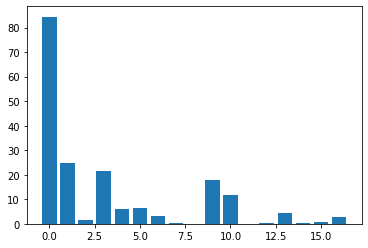

In [14]:
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

### Classification - Logistic Regression

In [15]:
train_x = dataset[['status', 'credit_history', 'purpose', 'savings','personal_status_sex',
              'property','other_installment_plans', 'housing','job','foreign_worker']]
train_y = dataset[["credit_risk"]]

In [16]:
X_train_lr,X_test_lr,y_train_lr,y_test_lr = train_test_split(train_x,train_y,test_size=0.33,random_state=21)

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear')
fit = lr.fit(X_train_lr,np.ravel(y_train_lr))
fit

LogisticRegression(solver='liblinear')

In [18]:
yhat = fit.predict(X_test_lr)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_lr, yhat)
print(confusion_matrix)

[[ 35  69]
 [ 16 210]]


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test_lr, yhat))

              precision    recall  f1-score   support

           0       0.69      0.34      0.45       104
           1       0.75      0.93      0.83       226

    accuracy                           0.74       330
   macro avg       0.72      0.63      0.64       330
weighted avg       0.73      0.74      0.71       330



As we mentioned earlier, due to that the dataset is imbalanced, our prediction model may not perform well. In order to solve this, we will oversample our data with SMOTE method

### Logistic Regression with SMOTE

In [26]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [29]:
X_train_smote,y_train_smote = smote.fit_sample(train_x,train_y)

AttributeError: 'SMOTE' object has no attribute 'fit_sample'

In [22]:
print("Before SMOTE: ", train_y["credit_risk"].value_counts())

Before SMOTE:  1    700
0    300
Name: credit_risk, dtype: int64


In [23]:
print("After SMOTE: ", y_train_smote["credit_risk"].value_counts())

After SMOTE:  1    700
0    700
Name: credit_risk, dtype: int64


In [24]:
lr.fit(X_train_smote,np.ravel(y_train_smote))
y_pred2 = lr.predict(X_test_lr)
print(classification_report(y_test_lr, y_pred2))

              precision    recall  f1-score   support

           0       0.45      0.57      0.50       104
           1       0.78      0.69      0.73       226

    accuracy                           0.65       330
   macro avg       0.61      0.63      0.62       330
weighted avg       0.67      0.65      0.66       330



Although I applied SMOTE() and reapplied the train sets, the regression model didn't perform well enough. Therefore, I will try another classification model

### Support Vector Machine

In [25]:
from sklearn.svm import SVC
svclassifier = SVC(kernel="poly",degree=10)
svclassifier.fit(X_train_smote,np.ravel(y_train_smote))

SVC(degree=10, kernel='poly')

In [26]:
yhat_svm = svclassifier.predict(X_test_lr)
print(classification_report(y_test_lr, yhat_svm))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       104
           1       0.99      0.96      0.98       226

    accuracy                           0.97       330
   macro avg       0.95      0.97      0.96       330
weighted avg       0.97      0.97      0.97       330

